In [1]:
import numpy as np
import cv2
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib import rcParams
from shapely.geometry import MultiPoint, box

# from pyquaternion.quaternion import Quaternion
from pyquaternion import Quaternion
import os.path as osp
from nuscenes import NuScenes

# Utils for Lidar and Radar
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.geometry_utils import view_points, BoxVisibility
from nuscenes.utils.data_classes import LidarPointCloud
from nuscenes.utils.data_classes import RadarPointCloud
from nuscenes.scripts.export_2d_annotations_as_json import get_2d_boxes, post_process_coords
from utils import *

from typing import Tuple, List, Dict, Union

%matplotlib inline

In [2]:
nusc = NuScenes(version='v1.0-mini', dataroot='/home/sherlock/Documents/nuScenes/data', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.5 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


## Example usage

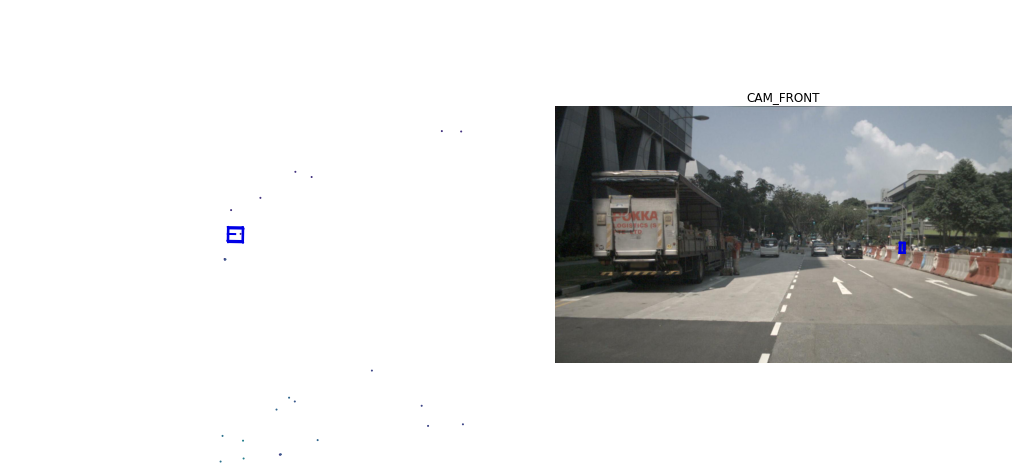

In [3]:
my_sample = nusc.sample[0]
annotation_token = my_sample['anns'][0]
my_annotation_metadata =  nusc.get('sample_annotation', annotation_token)
nusc.render_annotation(annotation_token)

In [5]:
camera_channel = get_camera_data(my_annotation_metadata['token'])
camera_channel

NameError: name 'nusc' is not defined

In [ ]:
cam_data = nusc.get('sample_data', my_sample['data'][camera_channel])
new_box = target_to_cam(cam_data['token'], annotation_token, camera_channel = camera_channel)

In [ ]:
coords = bbox_3d_to_2d(camera_token = cam_data['token'], annotation_token = annotation_token, visualize = True)
coords

In [ ]:
sensor_laser = 'LIDAR_TOP'

# Sample data from Sensor
point_data = nusc.get('sample_data', my_sample['data'][sensor_laser])
# Method to map a point cloud to a particular bounding box
points, coloring, ori_points, im = map_pointcloud_to_image_(coords, point_data['token'], 
                                                            cam_data['token'], visualize = True)